In [5]:
# Instalar emnist vía torchvision y descargar el dataset EMNIST Balanced
!pip install torchvision

import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import EMNIST

import torch
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 92.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 70.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 74.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [6]:
# Transformar a tensor y normalizar imágenes
transform = transforms.Compose([
    transforms.ToTensor()
])

# Cargar los datos (modo 'balanced')
train_dataset = EMNIST(root='.', split='balanced', train=True, download=True, transform=transform)
test_dataset = EMNIST(root='.', split='balanced', train=False, download=True, transform=transform)

# Convertir a numpy
def emnist_to_numpy(dataset):
    images = dataset.data.numpy()
    labels = dataset.targets.numpy()
    # Las imágenes vienen rotadas, hay que rotarlas correctamente
    images = np.transpose(images, (0, 2, 1))
    return images, labels

train_images, train_labels = emnist_to_numpy(train_dataset)
test_images, test_labels = emnist_to_numpy(test_dataset)


100%|██████████| 562M/562M [00:06<00:00, 92.3MB/s]


In [7]:
# Normalizar y expandir dimensión para canales (de 28x28 a 28x28x1)
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

train_images = np.expand_dims(train_images, -1)
test_images = np.expand_dims(test_images, -1)

num_classes = len(np.unique(train_labels))
train_labels_cat = to_categorical(train_labels, num_classes)
test_labels_cat = to_categorical(test_labels, num_classes)

print(f"Número de clases: {num_classes}")


Número de clases: 47


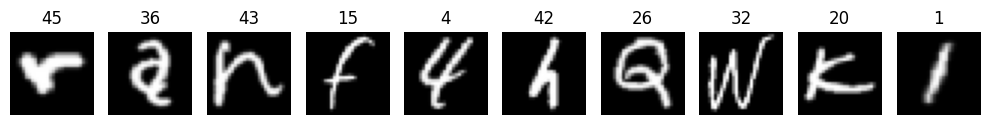

In [8]:
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(train_images[i].squeeze(), cmap='gray')
    plt.title(train_labels[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


In [9]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
history = model.fit(train_images, train_labels_cat,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)


Epoch 1/10
705/705 ━━━━━━━━━━━━━━━━━━━━ 97s 134ms/step - accuracy: 0.5127 - loss: 1.7511 - val_accuracy: 0.8384 - val_loss: 0.4648
Epoch 2/10
705/705 ━━━━━━━━━━━━━━━━━━━━ 135s 124ms/step - accuracy: 0.8177 - loss: 0.5451 - val_accuracy: 0.8543 - val_loss: 0.3956
Epoch 3/10
705/705 ━━━━━━━━━━━━━━━━━━━━ 141s 123ms/step - accuracy: 0.8453 - loss: 0.4492 - val_accuracy: 0.8676 - val_loss: 0.3595
Epoch 4/10
705/705 ━━━━━━━━━━━━━━━━━━━━ 146s 130ms/step - accuracy: 0.8597 - loss: 0.4020 - val_accuracy: 0.8729 - val_loss: 0.3458
Epoch 5/10
705/705 ━━━━━━━━━━━━━━━━━━━━ 138s 124ms/step - accuracy: 0.8668 - loss: 0.3729 - val_accuracy: 0.8752 - val_loss: 0.3371
Epoch 6/10
705/705 ━━━━━━━━━━━━━━━━━━━━ 146s 129ms/step - accuracy: 0.8782 - loss: 0.3375 - val_accuracy: 0.8734 - val_loss: 0.3370
Epoch 7/10
705/705 ━━━━━━━━━━━━━━━━━━━━ 88s 124ms/step - accuracy: 0.8837 - loss: 0.3186 - val_accuracy: 0.8812 - val_loss: 0.3217
Epoch 8/10
705/705 ━━━━━━━━━━━━━━━━━━━━ 141s 124ms/step - accuracy: 0.8868 - l

In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels_cat)
print(f'Precisión en el conjunto de prueba: {test_acc:.4f}')


588/588 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8818 - loss: 0.3423
Precisión en el conjunto de prueba: 0.8812


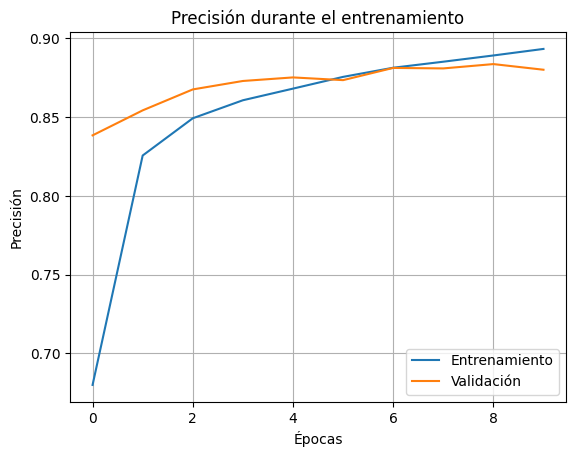

In [12]:
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


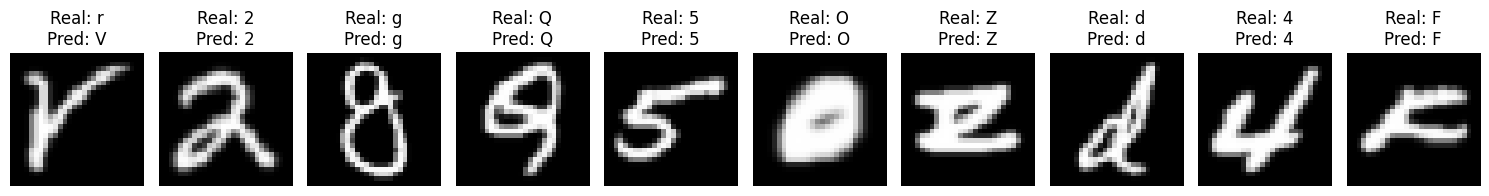

In [18]:
import random

# Seleccionar 10 muestras aleatorias del conjunto de prueba
num_samples = 10
indices = random.sample(range(len(test_images)), num_samples)
sample_images = test_images[indices]
sample_labels = test_labels[indices]

# Obtener predicciones del modelo
predictions = model.predict(sample_images)
predicted_labels = np.argmax(predictions, axis=1)

# Mapeo de índices a caracteres EMNIST Balanced
emnist_mapping = list("0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabdefghnqrt")

# Visualización
plt.figure(figsize=(15, 3))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(sample_images[i].squeeze(), cmap='gray')
    real_char = emnist_mapping[sample_labels[i]]
    pred_char = emnist_mapping[predicted_labels[i]]
    plt.title(f'Real: {real_char}\nPred: {pred_char}')
    plt.axis('off')
plt.tight_layout()
plt.show()
